In [2]:
import pandas as pd

births_df = pd.read_csv("births.csv")
print(births_df.head())
births_df['Decade'] = (births_df['year'] // 10) * 10

print(births_df.head())

births_df.to_csv("births_with_decade.csv", index=False)


   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


In [3]:
import pandas as pd
births_df = pd.read_csv("births.csv")

print(births_df.describe())


               year         month           day         births
count  15547.000000  15547.000000  15067.000000   15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561
std        6.728340      3.449632     15.284034   28552.465810
min     1969.000000      1.000000      1.000000       1.000000
25%     1974.000000      4.000000      8.000000    4358.000000
50%     1979.000000      7.000000     16.000000    4814.000000
75%     1984.000000     10.000000     24.000000    5289.500000
max     2008.000000     12.000000     99.000000  199622.000000


In [4]:
import pandas as pd
births_df = pd.read_csv("births.csv")

missing_values = births_df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
year        0
month       0
day       480
gender      0
births      0
dtype: int64


<Axes: title={'center': 'Trend of Male and Female Births Every Decade'}, xlabel='Decade', ylabel='Total Births'>

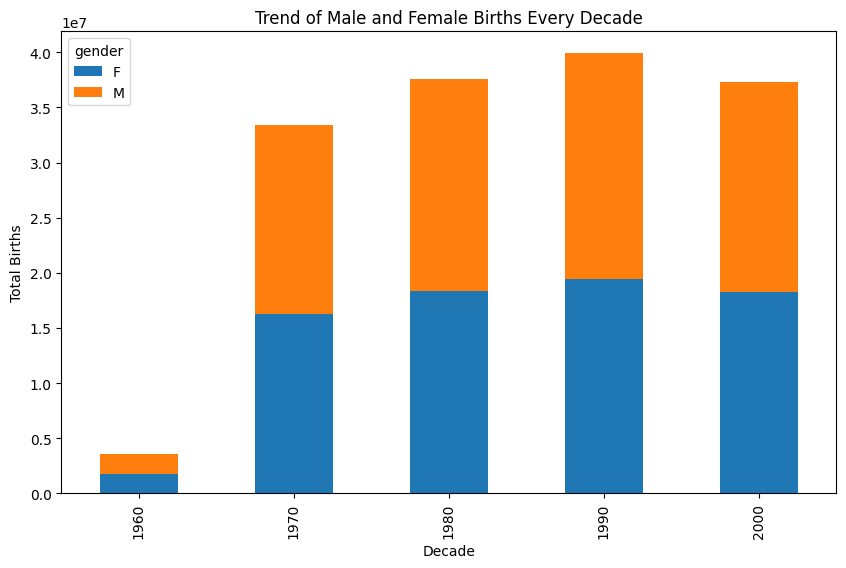

In [10]:
import pandas as pd
births_df = pd.read_csv("births.csv")
births_df['Decade'] = (births_df['year'] // 10) * 10

births_by_decade_gender = births_df.groupby(['Decade', 'gender'])['births'].sum().reset_index()
births_by_decade_gender_pivot = births_by_decade_gender.pivot(index='Decade', columns='gender', values='births')

births_by_decade_gender_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), xlabel='Decade', ylabel='Total Births', title='Trend of Male and Female Births Every Decade')

In [12]:
import pandas as pd

births_df = pd.read_csv("births.csv")
mean_births = births_df['births'].mean()
std_dev_births = births_df['births'].std()

lower_bound = mean_births - 5 * std_dev_births
upper_bound = mean_births + 5 * std_dev_births

filtered_births_df = births_df[(births_df['births'] >= lower_bound) & (births_df['births'] <= upper_bound)]

print(filtered_births_df.head())

filtered_births_df.to_csv("births_without_outliers.csv", index=False)

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


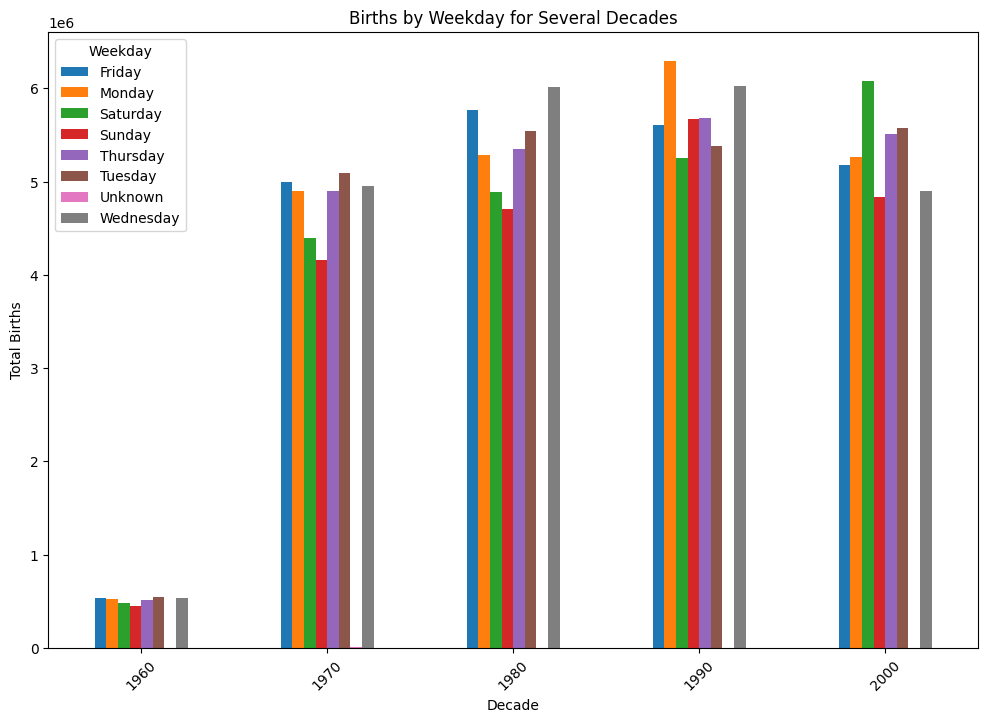

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

births_df = pd.read_csv("births.csv")

births_df['year'].fillna(2000, inplace=True)
births_df['month'].fillna(1, inplace=True)
births_df['day'].fillna(1, inplace=True)

births_df['year'] = births_df['year'].astype(int)
births_df['month'] = births_df['month'].astype(int)
births_df['day'] = births_df['day'].astype(int)

births_df['Decade'] = (births_df['year'] // 10) * 10

def calculate_weekday(row):
    year = int(row['year'])
    month = int(row['month'])
    day = int(row['day'])
    
    weekday = 'Unknown'
    
    try:
        date_obj = datetime.datetime(year, month, day)
        weekday = date_obj.strftime("%A")
    except ValueError:
        pass  
    
    return weekday
births_df['Weekday'] = births_df.apply(calculate_weekday, axis=1)
births_by_decade_weekday = births_df.groupby(['Decade', 'Weekday'])['births'].sum().reset_index()
births_by_decade_weekday_pivot = births_by_decade_weekday.pivot(index='Decade', columns='Weekday', values='births')
births_by_decade_weekday_pivot.plot(kind='bar', figsize=(12, 8), xlabel='Decade', ylabel='Total Births', title='Births by Weekday for Several Decades')
plt.xticks(rotation=45)
plt.legend(title='Weekday')
plt.show()\

In [19]:
import pandas as pd
births_df = pd.read_csv("births.csv")

births_by_month = births_df.groupby('month')['births'].sum().reset_index()

births_by_day = births_df.groupby('day')['births'].sum().reset_index()

print("Births by month:")
print(births_by_month.head())

print("\nBirths by day:")
print(births_by_day.head())


Births by month:
   month    births
0      1  12364197
1      2  11541178
2      3  12678844
3      4  12085891
4      5  12624972

Births by day:
   day   births
0  1.0  2286854
1  2.0  2303168
2  3.0  2309087
3  4.0  2286588
4  5.0  2296951
